Experiment 5+ : You will conduct several more experiments. (a) Redo all the 4 experiments with some regularization technique. (b) Create more experiments on your own by tweaking architectures and/or hyper parameters.

Result1:  Create a table with the accuracy and loss for train/test/validation & process time for ALL the models.

Result2: Take Experiment 3 – Extract the outputs from 2 filters from the 2 max pooling layers and visualize them in a grid as images. See whether the ‘lighted’ up regions correspond to some features in the original images.

[reference](https://home.mit.bme.hu/~hadhazi/Oktatas/NN18/dem3/html_demo/CIFAR-10Demo.html)

In [31]:
import numpy as np
import pandas as pd
from packaging import version

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

import time

In [32]:
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

In [33]:
#from google.colab import drive
#drive.mount('/content/gdrive')

**Functions**

In [34]:
import sys
assert sys.version_info >= (3, 7)
# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. Neural nets can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware "
              "accelerator.")
    if IS_KAGGLE:
        print("Go to Settings > Accelerator and select GPU.")

In [35]:
def plot_history(history):
  losses = history.history['loss']
  accs = history.history['accuracy']
  val_losses = history.history['val_loss']
  val_accs = history.history['val_accuracy']
  epochs = len(losses)

  plt.figure(figsize=(16, 4))
  for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
  plt.show()

**Data**

In [36]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [37]:
class_names = ['airplane'
,'automobile'
,'bird'
,'cat'
,'deer'
,'dog'
,'frog'
,'horse'
,'ship'
,'truck']

In [38]:
x_train_split, x_valid_split, y_train_split, y_valid_split = train_test_split(x_train
                                                                              ,y_train
                                                                              ,test_size=.1
                                                                              ,random_state=42
                                                                              ,shuffle=True)

In [39]:
x_train_norm = x_train_split/255
x_valid_norm = x_valid_split/255
x_test_norm = x_test/255

Experiment 5+ : You will conduct several more experiments. (a) Redo all the 4 experiments with some regularization technique. (b) Create more experiments on your own by tweaking architectures and/or hyper parameters.


Experiment 5 DNN 2 layers L1 regularization

In [40]:
from keras import regularizers

model5 = Sequential([
    Flatten(input_shape=x_train_norm.shape[1:]),
    Dense(256, activation='relu',kernel_regularizer=regularizers.L1(0.0001)),
    Dense(10, activation='softmax')
])

# Compile the model
model5.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
# Print the model summary
model5.summary()

t0 = time.time()
history = model5.fit(x_train_norm
                    ,y_train_split
                    ,epochs=20
                    ,batch_size=64
                    ,validation_data=(x_valid_norm, y_valid_split)
                   )
training_time = time.time()-t0

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 3072)              0         
                                                                 
 dense_15 (Dense)            (None, 256)               786688    
                                                                 
 dense_16 (Dense)            (None, 10)                2570      
                                                                 
Total params: 789258 (3.01 MB)
Trainable params: 789258 (3.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
704/704 [==============================] - 4s 5ms/step - loss: 2.5331 - accuracy: 0.3129 - val_loss: 2.0249 - val_accuracy: 0.3540
Epoch 2/20
704/704 [==============================] - 2s 3ms/step - loss: 1.9447 - accuracy: 0.3654 - val_loss: 1.9069 - val_accuracy: 0.363

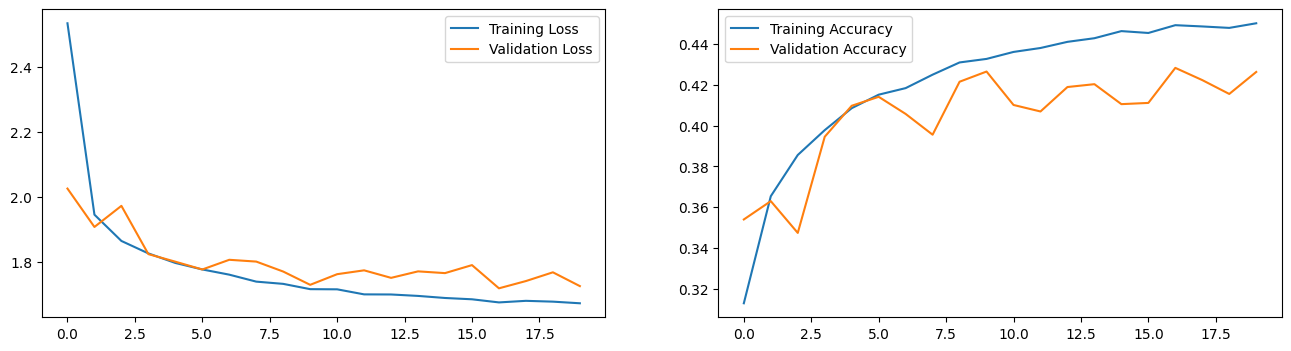

In [41]:
plot_history(history)

In [42]:
pred = model5.evaluate(x_test_norm, y_test)
list5= [history.history['accuracy'][-1],history.history['loss'][-1],
        history.history['val_accuracy'][-1],history.history['val_loss'][-1],
        pred[0],pred[1],training_time]
print(f"Test acc: {pred[1]:.3f}")

313/313 [==============================] - 1s 2ms/step - loss: 1.6975 - accuracy: 0.4427
Test acc: 0.443


Experiment 6 DNN 2 layers L2 regularization

In [43]:
model6 = Sequential([
    Flatten(input_shape=x_train_norm.shape[1:]),
    Dense(256, activation='relu',kernel_regularizer=regularizers.L2(0.0001)),
    Dense(10, activation='softmax')
])

# Compile the model
model6.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
# Print the model summary
model6.summary()

t0 = time.time()
history = model6.fit(x_train_norm
                    ,y_train_split
                    ,epochs=20
                    ,batch_size=64
                    ,validation_data=(x_valid_norm, y_valid_split)
                   )
training_time = time.time()-t0

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 3072)              0         
                                                                 
 dense_17 (Dense)            (None, 256)               786688    
                                                                 
 dense_18 (Dense)            (None, 10)                2570      
                                                                 
Total params: 789258 (3.01 MB)
Trainable params: 789258 (3.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
704/704 [==============================] - 3s 4ms/step - loss: 1.9566 - accuracy: 0.3206 - val_loss: 1.8129 - val_accuracy: 0.3718
Epoch 2/20
704/704 [==============================] - 2s 3ms/step - loss: 1.7646 - accuracy: 0.3806 - val_loss: 1.7440 - val_accuracy: 0.387

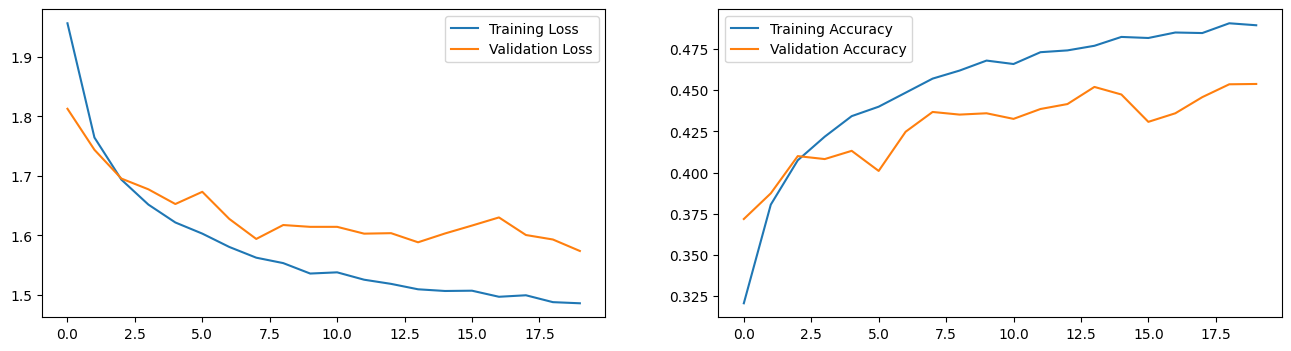

In [44]:
plot_history(history)

In [45]:
pred = model6.evaluate(x_test_norm, y_test)
list6= [history.history['accuracy'][-1],history.history['loss'][-1],
        history.history['val_accuracy'][-1],history.history['val_loss'][-1],
        pred[0],pred[1],training_time]
print(f"Test acc: {pred[1]:.3f}")

313/313 [==============================] - 1s 2ms/step - loss: 1.5414 - accuracy: 0.4673
Test acc: 0.467


Experiment 7 DNN 2 layers drop out

In [46]:
model7 = Sequential([
    Flatten(input_shape=x_train_norm.shape[1:]),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile the model
model7.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
# Print the model summary
model7.summary()

t0 = time.time()
history = model7.fit(x_train_norm
                    ,y_train_split
                    ,epochs=20
                    ,batch_size=64
                    ,validation_data=(x_valid_norm, y_valid_split)
                   )
training_time = time.time()-t0

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 3072)              0         
                                                                 
 dense_19 (Dense)            (None, 256)               786688    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 10)                2570      
                                                                 
Total params: 789258 (3.01 MB)
Trainable params: 789258 (3.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
704/704 [==============================] - 3s 4ms/step - loss: 2.0466 - accuracy: 0.2445 - val_loss: 1.8762 - val_accuracy: 0.3172
Epoch 2/

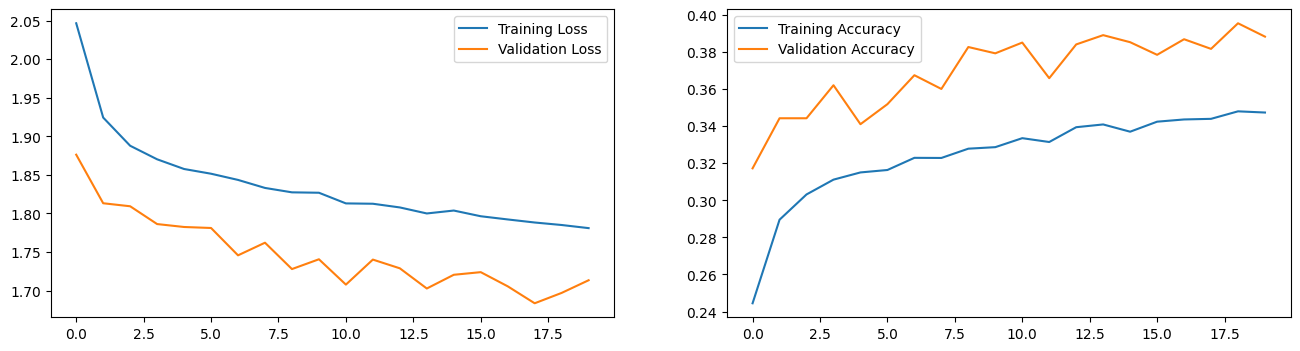

In [47]:
plot_history(history)

In [48]:
pred = model7.evaluate(x_test_norm, y_test)
list7= [history.history['accuracy'][-1],history.history['loss'][-1],
        history.history['val_accuracy'][-1],history.history['val_loss'][-1],
        pred[0],pred[1],training_time]
print(f"Test acc: {pred[1]:.3f}")

313/313 [==============================] - 1s 2ms/step - loss: 1.7034 - accuracy: 0.3908
Test acc: 0.391


Experiment 8 DNN 3 layers L1 regularization

In [49]:
model8 = Sequential([
    Flatten(input_shape=x_train_norm.shape[1:],),
    Dense(256, activation='relu', kernel_regularizer=regularizers.L1(0.0001)),
    Dense(128, activation='relu',kernel_regularizer=regularizers.L1(0.0001)),
    Dense(10, activation='softmax')
])

# Compile the model
model8.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
# Print the model summary
model8.summary()

t0 = time.time()
history = model8.fit(x_train_norm
                    ,y_train_split
                    ,epochs=20
                    ,batch_size=64
                    ,validation_data=(x_valid_norm, y_valid_split)
                   )
training_time = time.time()-t0

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 3072)              0         
                                                                 
 dense_21 (Dense)            (None, 256)               786688    
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 820874 (3.13 MB)
Trainable params: 820874 (3.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
704/704 [==============================] - 4s 5ms/step - loss: 2.4986 - accuracy: 0.3224 - val_loss: 2.0738 - val_accuracy: 0.3710
Epoch 2/

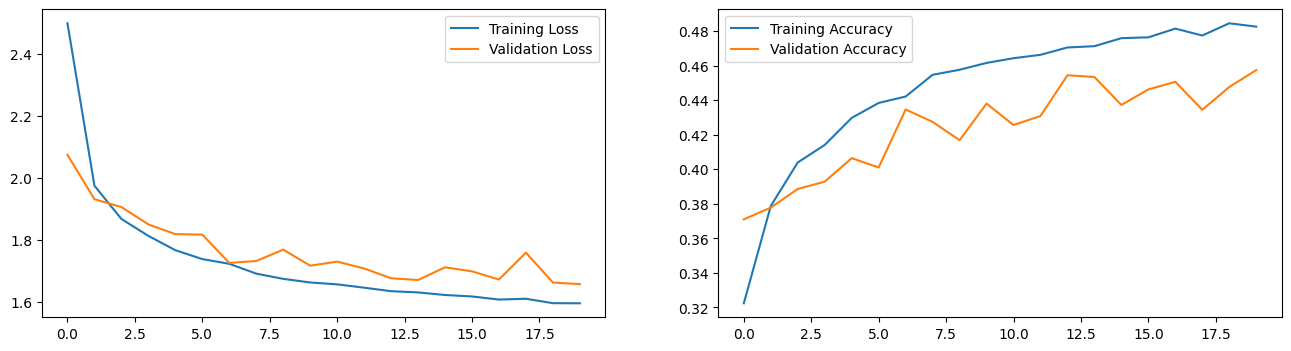

In [50]:
plot_history(history)

In [51]:
pred = model8.evaluate(x_test_norm, y_test)
list8= [history.history['accuracy'][-1],history.history['loss'][-1],
        history.history['val_accuracy'][-1],history.history['val_loss'][-1],
        pred[0],pred[1],training_time]
print(f"Test acc: {pred[1]:.3f}")

313/313 [==============================] - 1s 2ms/step - loss: 1.6359 - accuracy: 0.4658
Test acc: 0.466


Experiment 9 DNN 3 layers L2 regularization

In [52]:
model9 = Sequential([
    Flatten(input_shape=x_train_norm.shape[1:],),
    Dense(256, activation='relu', kernel_regularizer=regularizers.L2(0.0001)),
    Dense(128, activation='relu',kernel_regularizer=regularizers.L2(0.0001)),
    Dense(10, activation='softmax')
])

# Compile the model
model9.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
# Print the model summary
model9.summary()

t0 = time.time()
history = model9.fit(x_train_norm
                    ,y_train_split
                    ,epochs=20
                    ,batch_size=64
                    ,validation_data=(x_valid_norm, y_valid_split)
                   )
training_time = time.time()-t0

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 3072)              0         
                                                                 
 dense_24 (Dense)            (None, 256)               786688    
                                                                 
 dense_25 (Dense)            (None, 128)               32896     
                                                                 
 dense_26 (Dense)            (None, 10)                1290      
                                                                 
Total params: 820874 (3.13 MB)
Trainable params: 820874 (3.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
704/704 [==============================] - 4s 4ms/step - loss: 1.9206 - accuracy: 0.3239 - val_loss: 1.7851 - val_accuracy: 0.3662
Epoch 2

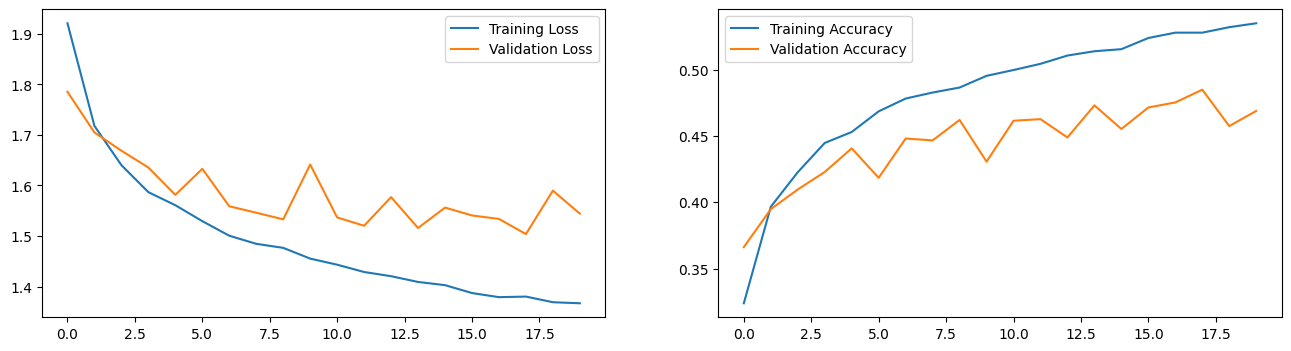

In [53]:
plot_history(history)

In [54]:
pred = model9.evaluate(x_test_norm, y_test)
list9= [history.history['accuracy'][-1],history.history['loss'][-1],
        history.history['val_accuracy'][-1],history.history['val_loss'][-1],
        pred[0],pred[1],training_time]
print(f"Test acc: {pred[1]:.3f}")

313/313 [==============================] - 1s 2ms/step - loss: 1.5139 - accuracy: 0.4803
Test acc: 0.480


Experiment 10 DNN 3 layers with drop out

In [55]:
model10 = Sequential([
    Flatten(input_shape=x_train_norm.shape[1:],),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile the model
model10.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
# Print the model summary
model10.summary()

t0 = time.time()
history = model10.fit(x_train_norm
                    ,y_train_split
                    ,epochs=20
                    ,batch_size=64
                    ,validation_data=(x_valid_norm, y_valid_split)
                   )
training_time = time.time()-t0

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 3072)              0         
                                                                 
 dense_27 (Dense)            (None, 256)               786688    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_28 (Dense)            (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_29 (Dense)            (None, 10)                1290      
                                                                 
Total params: 820874 (3.13 MB)
Trainable params: 8208

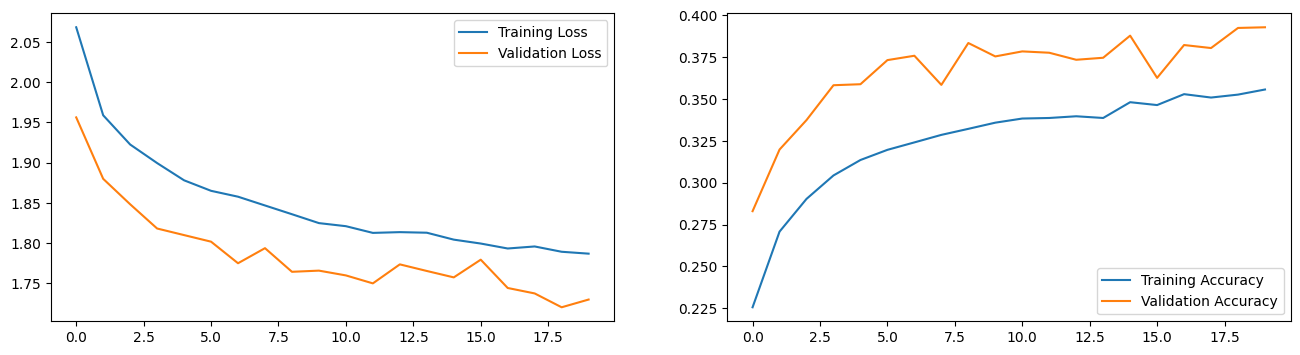

In [56]:
plot_history(history)

In [57]:
pred = model10.evaluate(x_test_norm, y_test)
list10= [history.history['accuracy'][-1],history.history['loss'][-1],
        history.history['val_accuracy'][-1],history.history['val_loss'][-1],
        pred[0],pred[1],training_time]
print(f"Test acc: {pred[1]:.3f}")

313/313 [==============================] - 1s 2ms/step - loss: 1.7123 - accuracy: 0.4109
Test acc: 0.411


Results

In [58]:
results = [list5, list6, list7,list8,list9, list10]
columns = ['training_accuracy','training_loss','val_accuracy','val_loss','testing_loss','testing_accuracy','training_time']
row_names = ['experiment5','experiment6','experiment7','experiment8','experiment9','experiment10']

# Create the DataFrame
results_df = pd.DataFrame(results, columns=columns,index = row_names)
results_df


,training_accuracy,training_loss,val_accuracy,val_loss,testing_loss,testing_accuracy,training_time
experiment5,0.450289,1.672268,0.4264,1.725060,1.697490,0.4427,84.195912
experiment6,0.489444,1.486009,0.4538,1.573917,1.541409,0.4673,84.618227
experiment7,0.347289,1.780998,0.3882,1.713436,1.703379,0.3908,84.086179
experiment8,0.482533,1.594371,0.4574,1.656319,1.635874,0.4658,84.201874
experiment9,0.534844,1.366981,0.4688,1.544164,1.513923,0.4803,84.721228
experiment10,0.355644,1.786620,0.3928,1.729466,1.712294,0.4109,56.740656


In [59]:
results_df.to_excel("results2.xlsx")